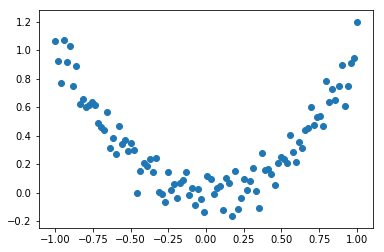

In [73]:
import torch
import torch.utils.data  as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

#批训练数据个数
BATCH_SIZE=32
#初始化数据
x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y=x.pow(2)+0.1*torch.normal(torch.zeros(x.size()))


#绘制散点图
plt.scatter(x.numpy(),y.numpy())
plt.show()

#DataLoader 是 torch 给你用来包装你的数据的工具，使用批训练帮助有效地迭代数据，

#转换数据Dataset
torch_dataset=Data.TensorDataset(data_tensor=x,target_tensor=y)
#把数据放入DataLoader ,shuffle: 要不要打乱数据 (打乱比较好）num_workers:读取数据的线程个数
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE,shuffle=True, num_workers=2)

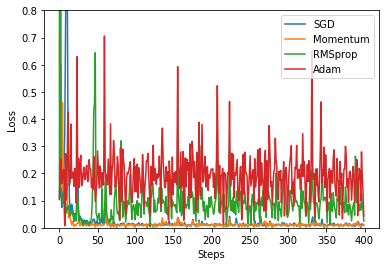

In [74]:
#定义神经网络
class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(1,20)
        self.predict=torch.nn.Linear(20,1)
        
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=self.predict(x)
        return x

#为每个优化器创建一个Net
net_SGD=Net()
net_Momentum=Net()
net_RMSprop=Net()
net_Adam=Net()
nets= [net_SGD, net_Momentum, net_RMSprop, net_Adam]

#优化器optimizer
opt_SGD=torch.optim.SGD(net_SGD.parameters(),lr=0.2)
opt_Momentum=torch.optim.SGD(net_Momentum.parameters(),lr=0.2,momentum=0.8)
opt_RMSprop=torch.optim.RMSprop(net_RMSprop.parameters(),lr=0.2,alpha=0.9)
opt_Adam=torch.optim.Adam(net_RMSprop.parameters(),lr=0.2,betas=(0.9,0.99))
optimizers= [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

loss_func=torch.nn.MSELoss()

#记录训练时不同神经网络的损失函数
losses_his=[[],[],[],[]]


#训练

for i in range(100):
    for step,(batch_x,batch_y) in enumerate(loader):
        b_x=Variable(batch_x)
        b_y=Variable(batch_y)
        
        #对每个优化器，优化相同的网络
        for net,opt,l_his in zip(nets,optimizers,losses_his):
            output=net(b_x)
            loss=loss_func(output,b_y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            l_his.append(loss.data[0])
            

labels=['SGD', 'Momentum', 'RMSprop', 'Adam']

for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.8))

plt.figure(1)
plt.show()

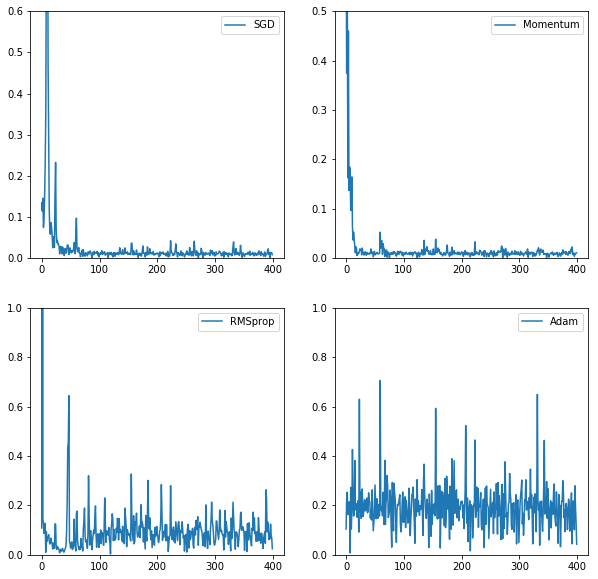

In [75]:
plt.figure(1,figsize=(10,10))
p1=plt.subplot(2,2,1)
p1.plot(losses_his[0],label=labels[0])
p1.legend(loc='best')
p1.set_ylim((0, 0.6))


p2=plt.subplot(2,2,2)
p2.plot(losses_his[1],label=labels[1])
p2.legend(loc='best')
p2.set_ylim((0, 0.5))

p3=plt.subplot(2,2,3)
p3.plot(losses_his[2],label=labels[2])
p3.legend(loc='best')
p3.set_ylim((0, 1))


p4=plt.subplot(2,2,4)
p4.plot(losses_his[3],label=labels[3])
p4.legend(loc='best')
p4.set_ylim((0, 1))

plt.show()